<a href="https://colab.research.google.com/github/alaka2019/Suicide-Rates/blob/main/Suicide_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHOR: ALAKA JAYAN

DATE: 12-12-2021

DATA SOURCE: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [ ]:
#Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving suiciderates.csv to suiciderates.csv


In [ ]:
#Reading CSV File
data=pd.read_csv("suiciderates.csv")

In [ ]:
data.shape

(27820, 11)

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers


Comaprison of the world wide number of male and female suicides 

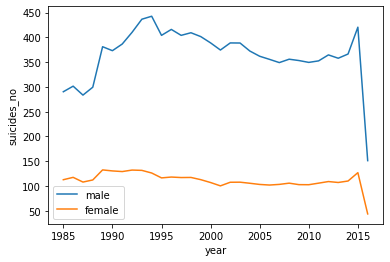

In [ ]:
male=data[data.sex=='male']
female=data[data.sex=='female']
sns.lineplot(x=male.year, y=male.suicides_no, ci=None)
sns.lineplot(x=female.year, y=female.suicides_no, ci=None)
plt.legend(["male", 'female'])
plt.show()

Analyse the trend for specific Generations over years

In [ ]:
group_wise=data.groupby(['year','generation'], as_index = False).sum()

In [ ]:
group_wise.head(20)

,year,generation,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita
0,1985,Boomers,20771,173536624,960.84,51.738,18494125705750,584758
1,1985,G.I. Generation,40690,192849873,3799.55,103.476,36988251411500,1169516
2,1985,Generation X,18854,396166961,860.81,103.476,36988251411500,1169516
3,1985,Silent,35748,246046628,1190.69,51.738,18494125705750,584758
4,1986,Boomers,21685,176214788,1017.01,0.000,22101605330478,684106
5,1986,G.I. Generation,42420,198039458,3617.01,0.000,44203210660956,1368212
6,1986,Generation X,19007,402054011,823.06,0.000,44203210660956,1368212
7,1986,Silent,37558,253601356,1122.76,0.000,22101605330478,684106
8,1987,Boomers,22309,188988532,1183.72,0.000,25961647045700,940960
9,1987,G.I. Generation,46517,215665860,4163.25,0.000,51923294091400,1881920


In [ ]:
group_wise[group_wise['generation']=='Generation Z']

,year,generation,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita
100,2007,Generation Z,1671,281095405,111.15,0.000,96084942646126,4118270
105,2008,Generation Z,1640,278903896,105.20,0.000,103220400640460,4489368
110,2009,Generation Z,1835,297254525,106.44,0.000,97472211599460,4024208
114,2010,Generation Z,1760,297317505,114.20,133.370,104310400914382,4198866
119,2011,Generation Z,1879,294238144,109.68,128.916,113000007888352,4489358
124,2012,Generation Z,1752,271680873,104.12,125.506,112750430030080,4343050
129,2013,Generation Z,1806,268175176,105.57,124.480,114175035302150,4485228
134,2014,Generation Z,1882,268239985,100.44,121.278,112082787569562,4277542
139,2015,Generation Z,1681,246636333,87.38,0.000,96738980716766,3252668


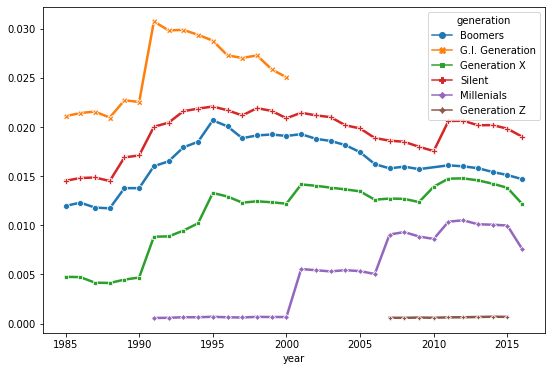

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x = group_wise.year, y = group_wise.suicides_no*100/group_wise.population, hue=group_wise.generation, style=group_wise.generation, markers=True, dashes=False, linewidth=2.5)
plt.show()

Analyse country wise Suicide rate

In [ ]:
country_wise=data.groupby(['country'], as_index = False)["suicides_no","population"].sum()
country_wise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,suicides_no,population
0,Albania,1970,62325467
1,Antigua and Barbuda,11,1990228
2,Argentina,82219,1035985431
3,Armenia,1905,77348173
4,Aruba,101,1259677
...,...,...,...
96,United Arab Emirates,622,36502275
97,United Kingdom,136805,1738767780
98,United States,1034013,8054027201
99,Uruguay,13138,84068943


In [ ]:
suicide_rate=country_wise.suicides_no*100/country_wise.population
country_wise['suicide_rate']=suicide_rate

In [ ]:
country_wise=country_wise.sort_values(by='suicide_rate', ascending=False)
country_wise

,country,suicides_no,population,suicide_rate
52,Lithuania,28039,68085210,0.041182
75,Russian Federation,1209742,3690802620,0.032777
87,Sri Lanka,55641,182525626,0.030484
11,Belarus,59892,197372292,0.030345
40,Hungary,73891,248644256,0.029718
...,...,...,...,...
1,Antigua and Barbuda,11,1990228,0.000553
45,Jamaica,184,39481817,0.000466
65,Oman,33,8987087,0.000367
27,Dominica,0,66400,0.000000


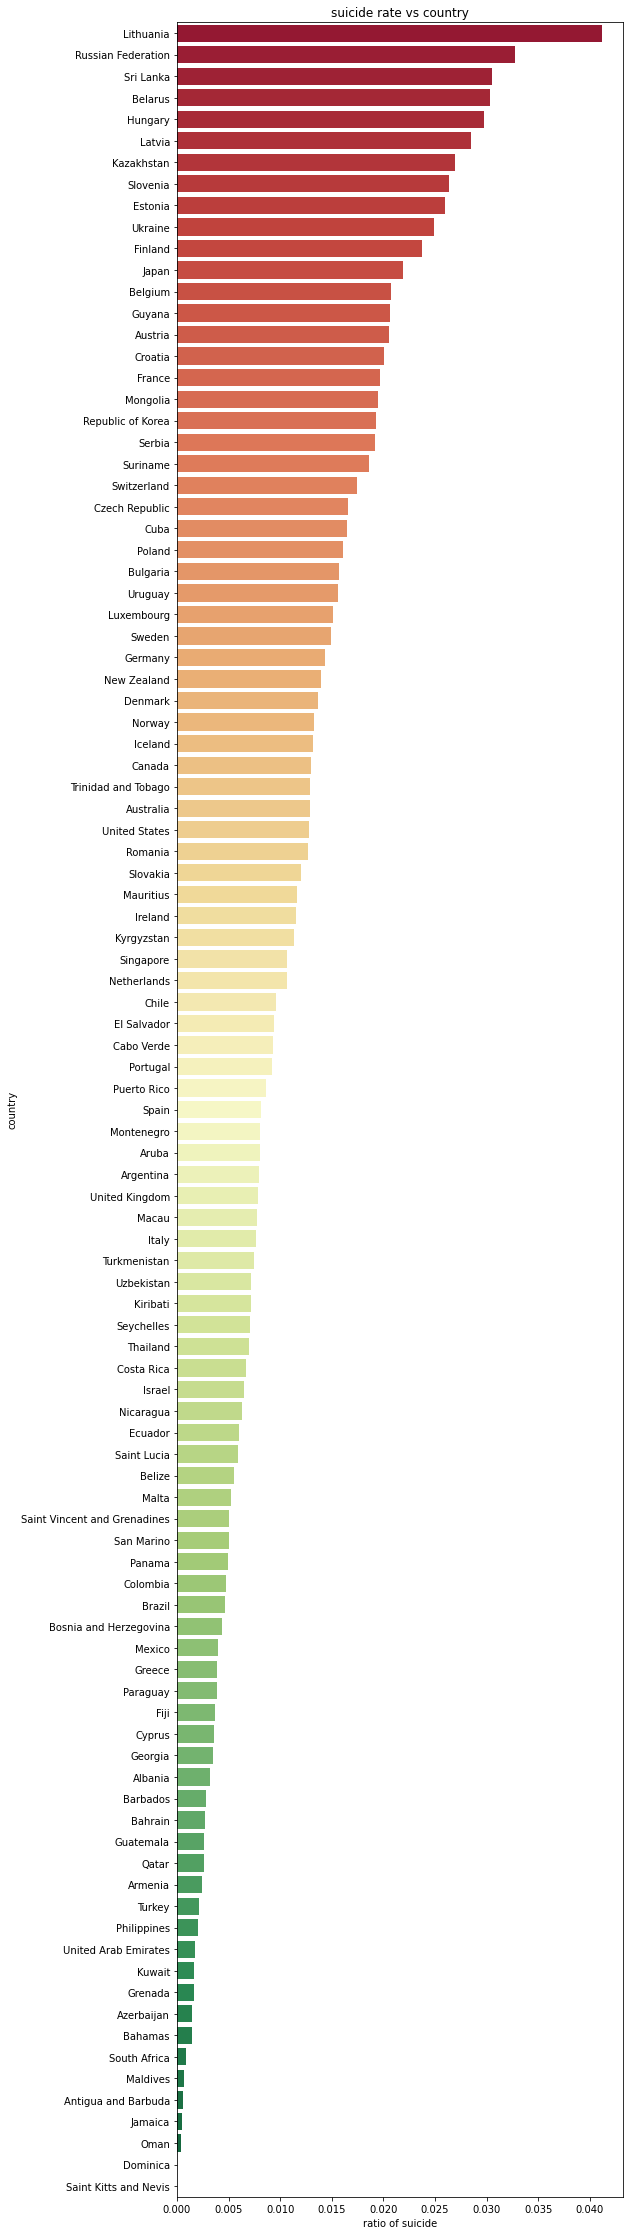

In [ ]:
plt.figure(figsize=(8,40))
sns.barplot(x=country_wise.suicide_rate,y=country_wise.country, palette="RdYlGn")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

Analysing generation wise Suicide rate

In [ ]:
generation_wise=data.groupby(['generation'], as_index = False)["suicides_no","population"].sum()
suicide_rate=generation_wise.suicides_no*100/generation_wise.population
generation_wise['suicide_rate']=suicide_rate
generation_wise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,generation,suicides_no,population,suicide_rate
0,Boomers,2284498,13350511729,0.017112
1,G.I. Generation,510009,2126202724,0.023987
2,Generation X,1532804,13472109292,0.011378
3,Generation Z,15906,2503541842,0.000635
4,Millenials,623459,10649461202,0.005854
5,Silent,1781744,9220331647,0.019324


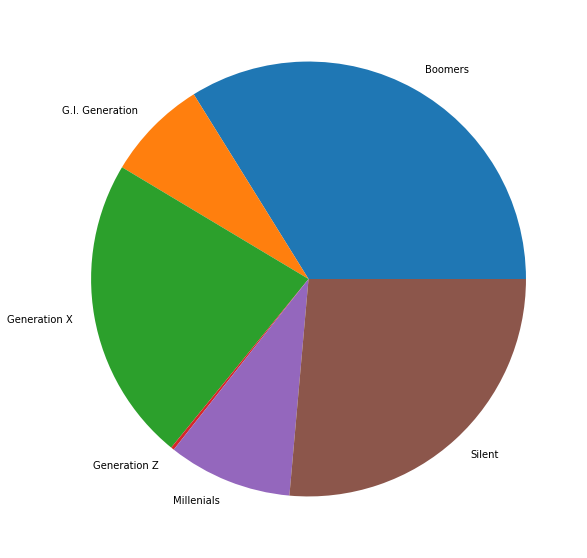

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(generation_wise.suicides_no, labels=generation_wise.generation)
plt.show()

Analysing Generation-wise suicide rate for each sex

In [ ]:
generation_sex_wise=data.groupby(['generation','sex'], as_index = False)["suicides_no","population"].sum()
suicide_rate=generation_sex_wise.suicides_no*100/generation_sex_wise.population
generation_sex_wise['suicide_rate']=suicide_rate
generation_sex_wise

,generation,sex,suicides_no,population,suicide_rate
0,Boomers,female,460968,6787470671,0.006791
1,Boomers,male,1823530,6563041058,0.027785
2,G.I. Generation,female,176653,1273832910,0.013868
3,G.I. Generation,male,333356,852369814,0.039109
4,Generation X,female,309839,6689631160,0.004632
5,Generation X,male,1222965,6782478132,0.018031
6,Generation Z,female,6141,1222728047,0.000502
7,Generation Z,male,9765,1280813795,0.000762
8,Millenials,female,133620,5222262689,0.002559
9,Millenials,male,489839,5427198513,0.009026


In [ ]:
male=generation_sex_wise[generation_sex_wise['sex']=='male']
female=generation_sex_wise[generation_sex_wise['sex']=='female']
print(female)
print(male)

         generation     sex  suicides_no  population  suicide_rate
0           Boomers  female       460968  6787470671      0.006791
2   G.I. Generation  female       176653  1273832910      0.013868
4      Generation X  female       309839  6689631160      0.004632
6      Generation Z  female         6141  1222728047      0.000502
8        Millenials  female       133620  5222262689      0.002559
10           Silent  female       472289  5076856380      0.009303
         generation   sex  suicides_no  population  suicide_rate
1           Boomers  male      1823530  6563041058      0.027785
3   G.I. Generation  male       333356   852369814      0.039109
5      Generation X  male      1222965  6782478132      0.018031
7      Generation Z  male         9765  1280813795      0.000762
9        Millenials  male       489839  5427198513      0.009026
11           Silent  male      1309455  4143475267      0.031603


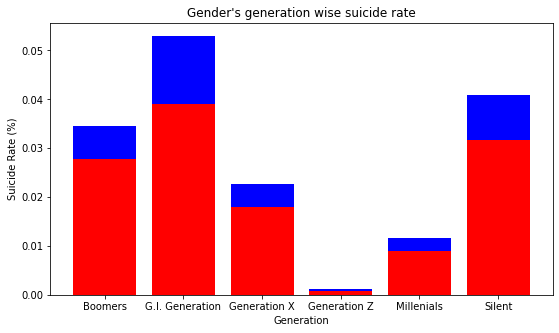

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(x=male.generation, height=male.suicide_rate, color='r')
plt.bar(x=female.generation, height=female.suicide_rate, bottom=male.suicide_rate, color='b')
plt.xlabel("Generation")
plt.ylabel("Suicide Rate (%)")
plt.title("Gender's generation wise suicide rate")
plt.show()